**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [67]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        if 'metric' in locals():
            self.metric = metric
        else:
            self.metric = 'euclidean'
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        numberOfClasses = 3
        my_pred = [] 
        for testPoint in X_test:
            testDist = [ [cdist([testPoint], [X_train[i]], self.metric), y_train[i]] for i in range(len(X_train)) ]
            stat = np.array([0 for i in range(numberOfClasses)])
            for d in sorted(testDist)[0:self.n_neighbors]:
                stat[d[1]] += 1
            my_pred.append(stat.argmax())
        return my_pred

In [47]:
# a = np.array([1, 2, 3])
# np.append(a, 4)

array([1, 2, 3, 4])

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [68]:
iris = datasets.load_iris()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [63]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [64]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [65]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
# %time clf.fit(X_train, y_train)

In [9]:
# %time my_clf.fit(X_train, y_train)

In [10]:
# %time clf.predict(X_test)

In [11]:
# %time my_clf.predict(X_test)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
# clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
# my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
# %time clf.fit(X_train, y_train)

In [15]:
# %time my_clf.fit(X_train, y_train)

In [16]:
# %time clf.predict(X_test)

In [17]:
# %time my_clf.predict(X_test)

In [18]:
# sklearn_pred = clf.predict(X_test)
# my_clf_pred = my_clf.predict(X_test)
# assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

In [74]:
# print(X.toarray().shape)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=55)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
from sklearn.model_selection import cross_val_score

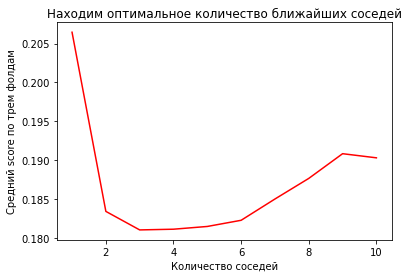

In [25]:
scores = []
for i in range(1, 11):
    my_clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    score = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей')
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

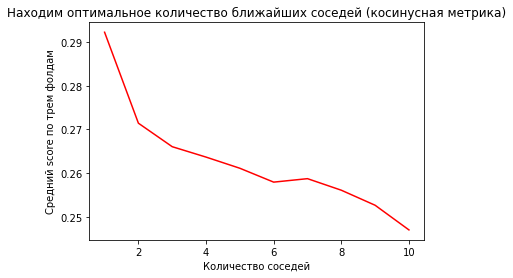

In [26]:
# metric='cosine'
scores = []
for i in range(1, 11):
    my_clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='cosine')
    score = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей (косинусная метрика)')
plt.show()

In [27]:
# используем TfIdf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

In [79]:
# print(X.toarray().shape)

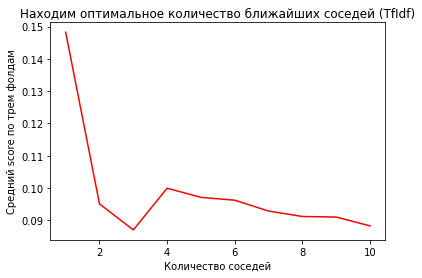

In [29]:
# TfIdf
scores = []
for i in range(1, 11):
    my_clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    score = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей (TfIdf)')
plt.show()

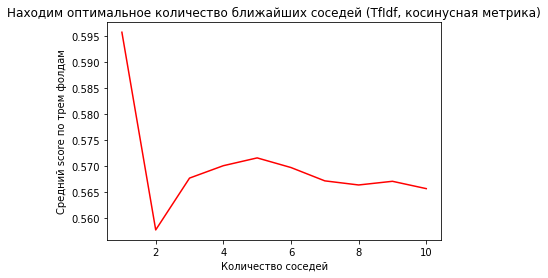

In [30]:
# TfIdf
# metric='cosine'
scores = []
for i in range(1, 11):
    my_clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='cosine')
    score = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'r')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.title('Находим оптимальное количество ближайших соседей (TfIdf, косинусная метрика)')
plt.show()

In [31]:
# Лучший средний score получен при использовании TfIdf, косинусной метрики и одного ближайшего соседа
my_clf = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='cosine')
score = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
print('score = ', score.mean())

score =  0.5957317107565182


Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [32]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [33]:
test_data = newsgroups['data']
test_target = newsgroups['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [34]:
# преобразовываем тестовый текст
vectorizer = TfidfVectorizer()
test_X = vectorizer.fit_transform(test_data)

In [35]:
# получаем тестовый score
my_clf = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='cosine')
score = cross_val_score(my_clf, test_X, test_target, cv=3, scoring='accuracy')
print('score = ', score.mean())

score =  0.5643760354171712


Результат получился хуже на 0.031 тк мы оптимизировали наш алгоритм под данные, которые отличаются от тестовых

На евклидовой метрике TfIdf показал себя хуже CountVectorizer, но при использовании TfIdf и косинусной метрики результат сильно взлетает 

Косинусная метрика при любом раскладе показала лучший результат чем евклидовая